In [1]:
import pandas as  pd
from pylab import *
%matplotlib inline

In [2]:
WT_alvino = pd.read_excel("../../data/external/alvino_2007/alvino_suppl_data1.xls")
timesA  = ["10","12.5A","15A","17.5A","25A","40A"]
timesB  = ["10","12.5B","15B","17.5B","25B","40B"]
times_c = [10,12.5,15,17.5,25,40]

In [3]:
WT_alvino.keys()

Index(['chr', 'coordinate (kb)', '%HL: tp10', '%HL: tp12.5A', '%HL: tp12.5B',
       '%HL: tp15A', '%HL: tp15B', '%HL: tp17.5A', '%HL: tp17.5B',
       '%HL: tp25A', '%HL: tp25B', '%HL: tp40A', '%HL: tp40B'],
      dtype='object')

# for one chromosome
## plot the profiles

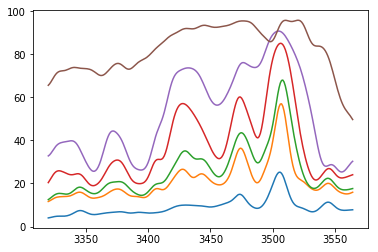

In [4]:
times = timesA
for time in times:
    plot(WT_alvino[WT_alvino.chr == 6]["%HL: "+"tp%s" % time])

In [5]:
## Organize the data: CNT as a function of time for each genome
# CNT = (time,genome_length)

In [6]:
CNT = []
for time,time_c in zip(times,times_c):
    CNT.append(np.array(WT_alvino[WT_alvino.chr == 6]["%HL: "+"tp%s" % time]))
CNT = np.array(CNT)

# Fit of one locus as a function of time
in order to compute when is the time at which 50 % is replicated which is going to be the definintion of mean replication time

[ 9.01800535  0.03047592]
Trep = 31.7620998974


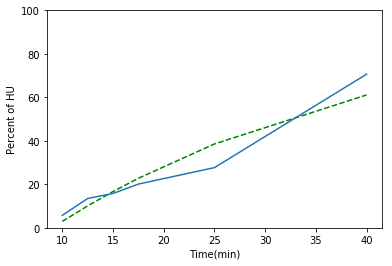

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

def func(t,a,b):
    return 100*(1-np.exp(-(t-a)*b))

xdata= times_c
ydata = CNT[::,40]
popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
print(popt)
plot(xdata, func(xdata, *popt), 'g--')
plot(xdata,ydata)
print("Trep =",popt[0]+np.log(2)/popt[1] )
#def Trep(times,x):
ylim(0,100)
xlabel("Time(min)")
ylabel("Percent of HU");
    

# fit of all locus on the chromosome

In [8]:
Trep = []
p0 = [9,0.05]
for xi in CNT.T:
    xdata= times_c
    ydata=xi
    popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
    Trep.append(popt[0]+np.log(2)/popt[1] )
    

# And plot the MRT for chromosome 6

Text(0,0.5,'MRT')

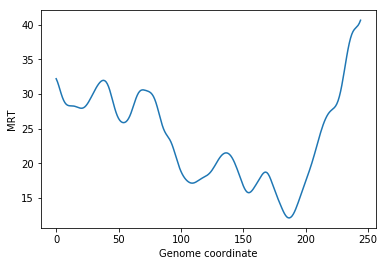

In [9]:
plot(Trep)
xlabel("Genome coordinate")
ylabel("MRT")

# Genome wide and for both replica

In [10]:


for times,rep in zip([timesA,timesB],["A","B"]):
    CNT = []
    for time,time_c in zip(times,times_c):
        CNT.append(np.array(WT_alvino["%HL: "+"tp%s" % time]))
    #plot(np.mean(CNT,axis=0)/100)
    CNT = np.array(CNT)

    Trep = []
    p0 = [9,0.05]
    for xi in CNT.T:
        xdata= times_c
        ydata=xi
        popt, pcov = curve_fit(func, xdata, ydata,p0=[9,0.05])
        Trep.append(popt[0]+np.log(2)/popt[1] )
    #plot(Trep)
    
    WT_alvino["Trep%s" % rep] = Trep                               

# Inspect both replica for WT and chromosome 4

Text(0,0.5,'MRT')

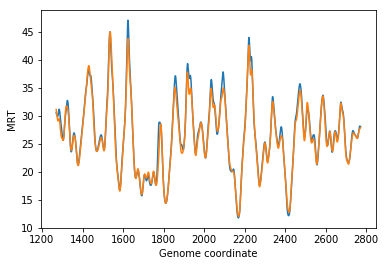

In [11]:
plot(WT_alvino[WT_alvino.chr == 4]["TrepA"])
plot(WT_alvino[WT_alvino.chr == 4]["TrepB"])
xlabel("Genome coordinate")
ylabel("MRT")

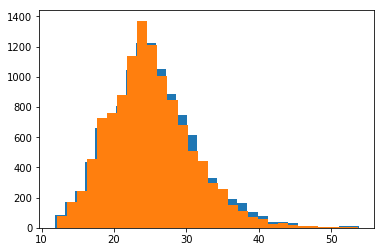

In [12]:
hist(WT_alvino["TrepA"],bins=30)
hist(WT_alvino["TrepB"],bins=30);

# Detect the peaks for both replica with triangular function

In [13]:
for rep in ["A","B"]:
    yes_no = []
    for ch in range(1,17):
        CNT = WT_alvino[WT_alvino.chr == ch]["Trep"+rep]
        yes_no.append(0)
        for i,j,k in zip(CNT[2:],CNT[1:-1],CNT[:-2]):
            if i>j and k > j:
                yes_no.append(1)
            else:
                yes_no.append(0)
        yes_no.append(0)
    #print(len(yes_no),len(WT_alvino))
    print(np.sum(yes_no))
    WT_alvino["peak"+rep] = yes_no

    

270
270


# plot the peaks against the profile for chromosome 6

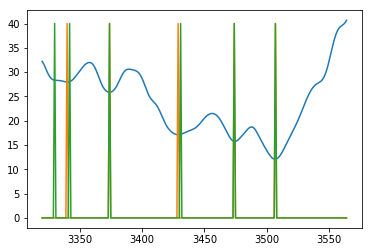

In [14]:
plot(WT_alvino[WT_alvino.chr == 6]["TrepA"])
plot(WT_alvino[WT_alvino.chr == 6]["peakA"]*40)
plot(WT_alvino[WT_alvino.chr == 6]["peakB"]*40)

#plot(WT_alvino[WT_alvino.chr == 4]["TrepB"])

# Histogram of the timing of each peak

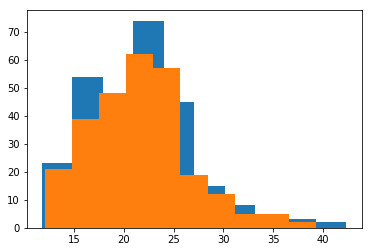

In [15]:
hist(WT_alvino["TrepA"][list(map(bool,WT_alvino["peakA"]))])
hist(WT_alvino["TrepB"][list(map(bool,WT_alvino["peakB"]))]);

# Compute f(t)

[-2014.62395294   -20.68481756]
[ 2108.36737595    20.54738337]


/home/jarbona/miniconda3/envs/ifromprof/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/jarbona/miniconda3/envs/ifromprof/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


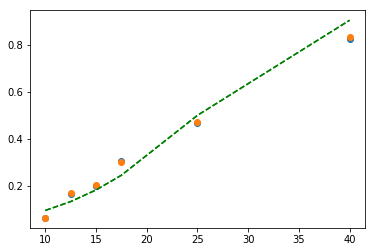

In [16]:


for times,rep in zip([timesA,timesB],["A","B"]):
    fracDNA = []

    times_c= np.array(times_c)
    for time in times:
        fracDNA.append(np.sum(WT_alvino["%HL: "+"tp%s" % time])/100/len(WT_alvino))
    plot(times_c,fracDNA,"o")
    
    
    def func(t,a,b):
        #b=0.2
        #print(t,a,b)
        return 1/(1+np.exp(-(t-a)*b))


    popt, pcov = curve_fit(func, np.array(time_c), fracDNA,p0=[25,0.15])
    print(popt)
    popt = [25,0.15]
    plot(times_c, func(np.array(xdata), *popt), 'g--')



# Plot for larger extent of time

Text(0,0.5,'Fraction of DNA')

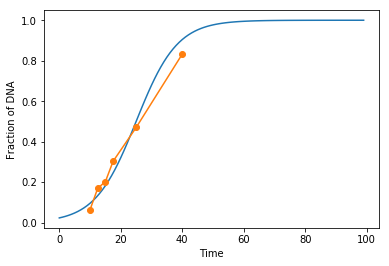

In [20]:
Time= np.arange(0,100,1)
plot(Time,func(Time,25,0.15))

plot(times_c,fracDNA,"-o")
xlabel("Time")
ylabel("Fraction of DNA")

# And now I(t) and f(t)

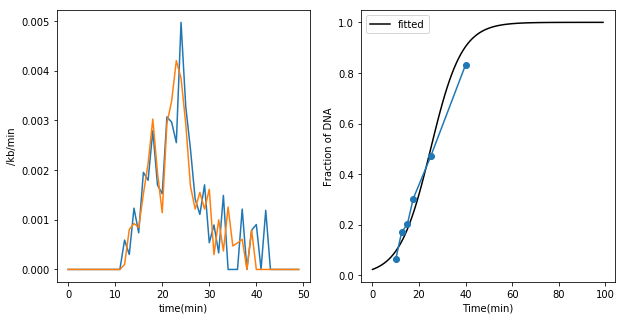

In [25]:
f = figure(figsize=(10,5))
ax = f.add_subplot(121) 
peak_time_A = WT_alvino["TrepA"][list(map(bool,WT_alvino["peakA"]))]
peak_time_B = WT_alvino["TrepB"][list(map(bool,WT_alvino["peakB"]))]

for peak_time in [peak_time_A,peak_time_B]:
    
    I = []
    for time in Time[:50]:
        n = np.sum( (peak_time > time -0.5) & (peak_time < time +0.5) )
        unrep = (1-func(time,25,0.15)) * len(WT_alvino)
        I.append(n/unrep)
    
    plot(I)
ylabel("/kb/min")
xlabel("time(min)");
ax = f.add_subplot(122) 

Time= np.arange(0,100,1)
plot(Time,func(Time,25,0.15),"-k",label="fitted")

plot(times_c,fracDNA,"-o")
xlabel("Time(min)")
ylabel("Fraction of DNA")
legend(loc="best")